In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import csv
from tqdm import tqdm
from collections import Counter

This notebook fetches the number of new stargazers per day for each repository and then aggregates and saves the data for the 5 repositories with the highest number of stargazers.

In [ ]:
file_path = '/content/drive/MyDrive/PMF 2 4/STROJNO + MREŽE/Data/recent_repositories_from_april.csv'
data = pd.read_csv(file_path)
data.head()

,merges_url,issue_comment_url,teams_url,branches_url,size,node_id,fork,forks,commits_url,languages_url,...,disabled,full_name,milestones_url,issue_events_url,contents_url,pushed_at,language,issues_url,license,archive_url
0,https://api.github.com/repos/tonyke-bot/ore-mi...,https://api.github.com/repos/tonyke-bot/ore-mi...,https://api.github.com/repos/tonyke-bot/ore-mi...,https://api.github.com/repos/tonyke-bot/ore-mi...,65,R_kgDOLtn1Cw,False,212,https://api.github.com/repos/tonyke-bot/ore-mi...,https://api.github.com/repos/tonyke-bot/ore-mi...,...,False,tonyke-bot/ore-miner,https://api.github.com/repos/tonyke-bot/ore-mi...,https://api.github.com/repos/tonyke-bot/ore-mi...,https://api.github.com/repos/tonyke-bot/ore-mi...,2024-04-16T02:16:07Z,Rust,https://api.github.com/repos/tonyke-bot/ore-mi...,NaN,https://api.github.com/repos/tonyke-bot/ore-mi...
1,https://api.github.com/repos/AmrDeveloper/Clan...,https://api.github.com/repos/AmrDeveloper/Clan...,https://api.github.com/repos/AmrDeveloper/Clan...,https://api.github.com/repos/AmrDeveloper/Clan...,1657,R_kgDOLqS5ZA,False,8,https://api.github.com/repos/AmrDeveloper/Clan...,https://api.github.com/repos/AmrDeveloper/Clan...,...,False,AmrDeveloper/ClangQL,https://api.github.com/repos/AmrDeveloper/Clan...,https://api.github.com/repos/AmrDeveloper/Clan...,https://api.github.com/repos/AmrDeveloper/Clan...,2024-05-09T01:47:39Z,Rust,https://api.github.com/repos/AmrDeveloper/Clan...,"{'key': 'mit', 'name': 'MIT License', 'spdx_id...",https://api.github.com/repos/AmrDeveloper/Clan...
2,https://api.github.com/repos/pcwalton/offset-a...,https://api.github.com/repos/pcwalton/offset-a...,https://api.github.com/repos/pcwalton/offset-a...,https://api.github.com/repos/pcwalton/offset-a...,26,R_kgDOL1LNQQ,False,5,https://api.github.com/repos/pcwalton/offset-a...,https://api.github.com/repos/pcwalton/offset-a...,...,False,pcwalton/offset-allocator,https://api.github.com/repos/pcwalton/offset-a...,https://api.github.com/repos/pcwalton/offset-a...,https://api.github.com/repos/pcwalton/offset-a...,2024-05-02T17:54:01Z,Rust,https://api.github.com/repos/pcwalton/offset-a...,"{'key': 'mit', 'name': 'MIT License', 'spdx_id...",https://api.github.com/repos/pcwalton/offset-a...
3,https://api.github.com/repos/tsoding/good_trai...,https://api.github.com/repos/tsoding/good_trai...,https://api.github.com/repos/tsoding/good_trai...,https://api.github.com/repos/tsoding/good_trai...,2299,R_kgDOLohbsQ,False,5,https://api.github.com/repos/tsoding/good_trai...,https://api.github.com/repos/tsoding/good_trai...,...,False,tsoding/good_training_language,https://api.github.com/repos/tsoding/good_trai...,https://api.github.com/repos/tsoding/good_trai...,https://api.github.com/repos/tsoding/good_trai...,2024-04-07T13:18:19Z,Rust,https://api.github.com/repos/tsoding/good_trai...,NaN,https://api.github.com/repos/tsoding/good_trai...
4,https://api.github.com/repos/bluskript/nix-ins...,https://api.github.com/repos/bluskript/nix-ins...,https://api.github.com/repos/bluskript/nix-ins...,https://api.github.com/repos/bluskript/nix-ins...,207,R_kgDOLomExw,False,2,https://api.github.com/repos/bluskript/nix-ins...,https://api.github.com/repos/bluskript/nix-ins...,...,False,bluskript/nix-inspect,https://api.github.com/repos/bluskript/nix-ins...,https://api.github.com/repos/bluskript/nix-ins...,https://api.github.com/repos/bluskript/nix-ins...,2024-04-19T02:21:13Z,Rust,https://api.github.com/repos/bluskript/nix-ins...,"{'key': 'mit', 'name': 'MIT License', 'spdx_id...",https://api.github.com/repos/bluskript/nix-ins...


In [ ]:
num_rows = len(data)
print("Number of rows:", num_rows)

Number of rows: 50


In [ ]:
unique_repo_names = data['full_name'].nunique()
print(f"Number of unique repositories: {unique_repo_names}")

Number of unique repositories: 50


In [ ]:
total_stargazers = data['stargazers_count'].sum()
print("Total number of stargazers:", total_stargazers)

Total number of stargazers: 4499


In [ ]:
new_df = data[['full_name', 'created_at', 'stargazers_count']]
print(new_df.head())

                        full_name            created_at  stargazers_count
0            tonyke-bot/ore-miner  2024-04-13T08:25:19Z               461
1            AmrDeveloper/ClangQL  2024-04-05T14:12:53Z               428
2       pcwalton/offset-allocator  2024-04-30T07:26:17Z               351
3  tsoding/good_training_language  2024-04-02T01:10:37Z               317
4           bluskript/nix-inspect  2024-04-02T05:45:28Z               244


<ipython-input-8-d1097d541745>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['created_at'] = pd.to_datetime(new_df['created_at'])
<ipython-input-8-d1097d541745>:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  new_df['week'] = new_df['created_at'].dt.to_period('W')
<ipython-input-8-d1097d541745>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['week'] = new_df['created_at'].dt.to_period('W')


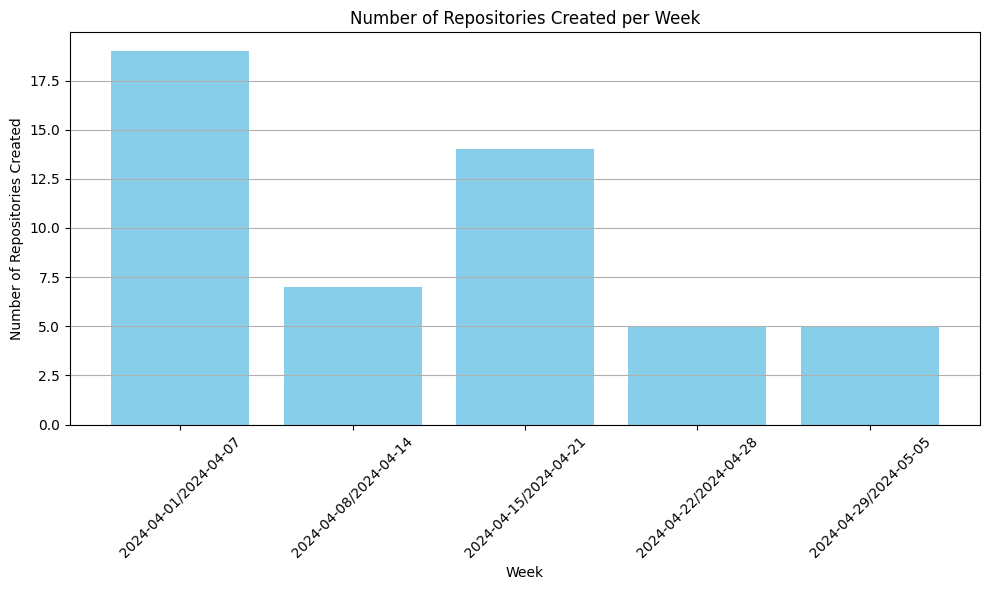

In [ ]:
new_df['created_at'] = pd.to_datetime(new_df['created_at'])

new_df['week'] = new_df['created_at'].dt.to_period('W')
weekly_repo_counts = new_df.groupby('week').size().reset_index(name='repo_count')

plt.figure(figsize=(10, 6))
plt.bar(weekly_repo_counts['week'].astype(str), weekly_repo_counts['repo_count'], color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('Week')
plt.ylabel('Number of Repositories Created')
plt.title('Number of Repositories Created per Week')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
new_df['created_at'] = pd.to_datetime(new_df['created_at']).dt.tz_localize(None)
end_date = pd.to_datetime('2024-04-28').tz_localize(None)

filtered_df = new_df[new_df['created_at'] <= end_date]
print(filtered_df.head())

                        full_name          created_at  stargazers_count  \
0            tonyke-bot/ore-miner 2024-04-13 08:25:19               461   
1            AmrDeveloper/ClangQL 2024-04-05 14:12:53               428   
3  tsoding/good_training_language 2024-04-02 01:10:37               317   
4           bluskript/nix-inspect 2024-04-02 05:45:28               244   
5            BenjaSOL/ore-cli-gpu 2024-04-15 01:15:23               230   

                    week  
0  2024-04-08/2024-04-14  
1  2024-04-01/2024-04-07  
3  2024-04-01/2024-04-07  
4  2024-04-01/2024-04-07  
5  2024-04-15/2024-04-21  


<ipython-input-9-0cdc2cbeb13d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['created_at'] = pd.to_datetime(new_df['created_at']).dt.tz_localize(None)


In [ ]:
num_rows = len(filtered_df)
print("Number of rows:", num_rows)

Number of rows: 43


In [ ]:
print(filtered_df['full_name'].tolist())

['tonyke-bot/ore-miner', 'AmrDeveloper/ClangQL', 'tsoding/good_training_language', 'bluskript/nix-inspect', 'BenjaSOL/ore-cli-gpu', 'obhq/jailbreak-11', 'achristmascarl/three_body', 'TanTanDev/binary_greedy_mesher_demo', 'ninja-quant/ninjabook', 'say4n/jf', 'rosedblabs/rust-practice', 'shenjinti/fgpt', 'utnet-org/utility', 'integration-os/integrationos', 'lapce/tiron', 'frostb1ten/CVE-2024-24576-PoC', 'nwaliaez/ascii_art', 'gold-silver-copper/ratatui_egui_wasm', 'a16z/zkvm-benchmarks', 'sarah-ek/diol', 'biomejs/biome-zed', 'vyfor/cord.nvim', 'Decurity/tx-coverage', 'Oldwarma/memento-master', 'adam-mcdaniel/music-generation', 'AugmendTech/Snippy', 'mathetake/tvisor', 'sommerfelddev/sentrum', 'Parms-Crypto/CUDA-ORE-DUMP', 'buffalojoec/modular-svm', 'henke443/fast-graph', 'Kharos102/interceptor', 'risechain/block-stm-revm', 'zesterer/ffd', 'mcmah309/error_set', 'cygaar/inkmate', 'etherhood/Liquidator-Morpho', 'arun11299/How-not-to-async-rs', 'sleeprite/rudis', 'zemse/forge-flamegraph', 'm

In [ ]:
from datetime import datetime, timedelta
import requests

def get_stargazers(repo_full_name):
    url = "https://api.opensauced.pizza/v2/histogram/stars"
    params = {
        "range": 90,
        "prev_days_start_date": 0,
        "width": 1,
        "repo": repo_full_name,
        "orderDirection": "ASC"
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to retrieve data for {repo_full_name}")
        return None

# data_frame = pd.read_csv("/content/drive/MyDrive/PMF 2 4/STROJNO + MREŽE/Data/recent_repositories_from_april.csv")
filtered_df['created_at'] = pd.to_datetime(filtered_df['created_at'])

stargazers_data = []

for index, row in filtered_df.iterrows():
    repo_full_name = row['full_name']
    creation_date = row['created_at']

    stargazers_info = get_stargazers(repo_full_name)

    if stargazers_info:
        for entry in stargazers_info:
            date_str = entry['bucket']
            stargazers_count = entry['star_count']

            date_str = date_str.split('T')[0]

            date = datetime.strptime(date_str, "%Y-%m-%d").date()
            days_since_creation = (date - creation_date.date()).days

            stargazers_data.append({
                'full_name': repo_full_name,
                'date': date,
                'stargazers_count': stargazers_count,
                'days_since_creation': days_since_creation
            })

stargazers_df = pd.DataFrame(stargazers_data)
print(stargazers_df)

<ipython-input-12-1c5ca8d42166>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['created_at'] = pd.to_datetime(filtered_df['created_at'])


                     full_name        date  stargazers_count  \
0         tonyke-bot/ore-miner  2024-04-13                70   
1         tonyke-bot/ore-miner  2024-04-14               115   
2         tonyke-bot/ore-miner  2024-04-15                63   
3         tonyke-bot/ore-miner  2024-04-16               110   
4         tonyke-bot/ore-miner  2024-04-17                72   
..                         ...         ...               ...   
821  kamyar1979/rust-dyn-proxy  2024-04-25                 1   
822  kamyar1979/rust-dyn-proxy  2024-04-26                 1   
823  kamyar1979/rust-dyn-proxy  2024-04-28                 2   
824  kamyar1979/rust-dyn-proxy  2024-05-18                 1   
825  kamyar1979/rust-dyn-proxy  2024-06-04                 1   

     days_since_creation  
0                      0  
1                      1  
2                      2  
3                      3  
4                      4  
..                   ...  
821                   19  
822            

In [ ]:
unique_days_since_creation = stargazers_df['days_since_creation'].unique()
print(unique_days_since_creation)

[  0   1   2   3   4   5   6   7   8  10  15  22  24  27  31  42  48  50
  53  60   9  11  12  13  16  18  19  21  23  26  29  33  34  35  36  37
  38  39  45  52  58  61  67  68  69  70  71  14  17  20  25  28  30  32
  40  41  43  44  46  47  49  54  55  56  57  59  63  64  66  74  75  51
  65  72  73  -3  -2  -1  62 -10  -9]


In [ ]:
num_unique_days_since_creation = len(unique_days_since_creation)
print(num_unique_days_since_creation)

81


In [ ]:
value_counts_days_since_creation = stargazers_df['days_since_creation'].value_counts()
print(value_counts_days_since_creation)

days_since_creation
 3     31
 4     31
 1     30
 2     28
 5     28
       ..
 74     1
-2      1
-3      1
 75     1
-9      1
Name: count, Length: 81, dtype: int64


In [ ]:
print(value_counts_days_since_creation.head(30))

days_since_creation
3     31
4     31
1     30
2     28
5     28
7     26
6     25
14    24
0     23
8     23
11    22
9     20
10    19
15    19
12    17
17    17
16    17
23    16
20    16
13    16
26    14
18    13
27    13
19    12
21    12
22    12
41    11
34    11
35    11
25    10
Name: count, dtype: int64


In [ ]:
stargazers_df = stargazers_df[stargazers_df['days_since_creation'] <= 30]
print(stargazers_df)

                     full_name        date  stargazers_count  \
0         tonyke-bot/ore-miner  2024-04-13                70   
1         tonyke-bot/ore-miner  2024-04-14               115   
2         tonyke-bot/ore-miner  2024-04-15                63   
3         tonyke-bot/ore-miner  2024-04-16               110   
4         tonyke-bot/ore-miner  2024-04-17                72   
..                         ...         ...               ...   
819  kamyar1979/rust-dyn-proxy  2024-04-22                 4   
820  kamyar1979/rust-dyn-proxy  2024-04-23                 2   
821  kamyar1979/rust-dyn-proxy  2024-04-25                 1   
822  kamyar1979/rust-dyn-proxy  2024-04-26                 1   
823  kamyar1979/rust-dyn-proxy  2024-04-28                 2   

     days_since_creation  
0                      0  
1                      1  
2                      2  
3                      3  
4                      4  
..                   ...  
819                   16  
820            

In [ ]:
unique_days_since_creation = stargazers_df['days_since_creation'].unique()
print(unique_days_since_creation)

[  0   1   2   3   4   5   6   7   8  10  15  22  24  27   9  11  12  13
  16  18  19  21  23  26  29  14  17  20  25  28  30  -3  -2  -1 -10  -9]


In [ ]:
negative_days_since_creation = stargazers_df[stargazers_df['days_since_creation'] < 0]
print(negative_days_since_creation)

             full_name        date  stargazers_count  days_since_creation
358  utnet-org/utility  2024-03-31               112                   -3
359  utnet-org/utility  2024-04-01                 4                   -2
360  utnet-org/utility  2024-04-02                 3                   -1
549    vyfor/cord.nvim  2024-03-28                 1                  -10
550    vyfor/cord.nvim  2024-03-29                 1                   -9


In [ ]:
repos_to_exclude = ['utnet-org/utility', 'vyfor/cord.nvim']
filtered_df = stargazers_df[~stargazers_df['full_name'].isin(repos_to_exclude)]

print(filtered_df)

                     full_name        date  stargazers_count  \
0         tonyke-bot/ore-miner  2024-04-13                70   
1         tonyke-bot/ore-miner  2024-04-14               115   
2         tonyke-bot/ore-miner  2024-04-15                63   
3         tonyke-bot/ore-miner  2024-04-16               110   
4         tonyke-bot/ore-miner  2024-04-17                72   
..                         ...         ...               ...   
819  kamyar1979/rust-dyn-proxy  2024-04-22                 4   
820  kamyar1979/rust-dyn-proxy  2024-04-23                 2   
821  kamyar1979/rust-dyn-proxy  2024-04-25                 1   
822  kamyar1979/rust-dyn-proxy  2024-04-26                 1   
823  kamyar1979/rust-dyn-proxy  2024-04-28                 2   

     days_since_creation  
0                      0  
1                      1  
2                      2  
3                      3  
4                      4  
..                   ...  
819                   16  
820            

In [ ]:
unique_days_since_creation = filtered_df['days_since_creation'].unique()
print(unique_days_since_creation)

[ 0  1  2  3  4  5  6  7  8 10 15 22 24 27  9 11 12 13 16 18 19 21 23 26
 29 14 17 20 25 28 30]


In [ ]:
complete_days_set = set(range(1, 31))

all_combinations = []
for full_name in filtered_df['full_name'].unique():
    existing_days = set(filtered_df[filtered_df['full_name'] == full_name]['days_since_creation'])
    missing_days = complete_days_set - existing_days
    for day in missing_days:
        all_combinations.append({'full_name': full_name, 'days_since_creation': day, 'stargazers_count': 0})

complete_df = pd.concat([filtered_df, pd.DataFrame(all_combinations)], ignore_index=True)

complete_df['stargazers_count'].fillna(0, inplace=True)

complete_df.sort_values(by=['full_name', 'days_since_creation'], inplace=True)

complete_df.reset_index(drop=True, inplace=True)

print(complete_df)

                 full_name        date  stargazers_count  days_since_creation
0     AmrDeveloper/ClangQL  2024-04-05                 2                    0
1     AmrDeveloper/ClangQL  2024-04-06                22                    1
2     AmrDeveloper/ClangQL  2024-04-07                79                    2
3     AmrDeveloper/ClangQL  2024-04-08               113                    3
4     AmrDeveloper/ClangQL  2024-04-09                75                    4
...                    ...         ...               ...                  ...
1247          zesterer/ffd         NaN                 0                   26
1248          zesterer/ffd         NaN                 0                   27
1249          zesterer/ffd         NaN                 0                   28
1250          zesterer/ffd         NaN                 0                   29
1251          zesterer/ffd         NaN                 0                   30

[1252 rows x 4 columns]


In [ ]:
value_counts_days_since_creation = complete_df['days_since_creation'].value_counts()
print(value_counts_days_since_creation)

days_since_creation
15    41
16    41
29    41
28    41
27    41
26    41
25    41
24    41
23    41
22    41
21    41
20    41
19    41
18    41
17    41
30    41
1     41
14    41
13    41
12    41
11    41
10    41
9     41
8     41
7     41
6     41
5     41
4     41
3     41
2     41
0     22
Name: count, dtype: int64


In [ ]:
unique_full_names_num = complete_df['full_name'].nunique()
print(unique_full_names_num)

41


In [ ]:
unique_days_since_creation = complete_df['days_since_creation'].nunique()
print(unique_days_since_creation)

31


In [ ]:
complete_df.tail(40)

,full_name,date,stargazers_count,days_since_creation
1212,zemse/forge-flamegraph,NaN,0,22
1213,zemse/forge-flamegraph,NaN,0,23
1214,zemse/forge-flamegraph,NaN,0,24
1215,zemse/forge-flamegraph,NaN,0,25
1216,zemse/forge-flamegraph,NaN,0,26
1217,zemse/forge-flamegraph,NaN,0,27
1218,zemse/forge-flamegraph,NaN,0,28
1219,zemse/forge-flamegraph,NaN,0,29
1220,zemse/forge-flamegraph,NaN,0,30
1221,zesterer/ffd,2024-04-06,9,0


In [ ]:
unique_full_names_num = complete_df['full_name'].nunique()
print(unique_full_names_num)

41


In [ ]:
unique_full_names = complete_df['full_name'].unique()
for repo in unique_full_names:
    print(repo)

AmrDeveloper/ClangQL
AugmendTech/Snippy
BenjaSOL/ore-cli-gpu
Decurity/tx-coverage
IncredibleDevHQ/Incredible.dev
Kharos102/interceptor
Oldwarma/memento-master
Parms-Crypto/CUDA-ORE-DUMP
TanTanDev/binary_greedy_mesher_demo
a16z/zkvm-benchmarks
achristmascarl/three_body
adam-mcdaniel/music-generation
arun11299/How-not-to-async-rs
biomejs/biome-zed
bluskript/nix-inspect
buffalojoec/modular-svm
cygaar/inkmate
etherhood/Liquidator-Morpho
frostb1ten/CVE-2024-24576-PoC
gold-silver-copper/ratatui_egui_wasm
henke443/fast-graph
integration-os/integrationos
kamyar1979/rust-dyn-proxy
lapce/tiron
mathetake/tvisor
mattatz/curvo
mcmah309/error_set
ninja-quant/ninjabook
nwaliaez/ascii_art
obhq/jailbreak-11
risechain/block-stm-revm
rosedblabs/rust-practice
sarah-ek/diol
say4n/jf
shenjinti/fgpt
sleeprite/rudis
sommerfelddev/sentrum
tonyke-bot/ore-miner
tsoding/good_training_language
zemse/forge-flamegraph
zesterer/ffd


In [ ]:
repo_stargazers = complete_df.groupby('full_name')['stargazers_count'].sum()

print(repo_stargazers)

full_name
AmrDeveloper/ClangQL                    421
AugmendTech/Snippy                       37
BenjaSOL/ore-cli-gpu                    232
Decurity/tx-coverage                     38
IncredibleDevHQ/Incredible.dev           29
Kharos102/interceptor                    30
Oldwarma/memento-master                  47
Parms-Crypto/CUDA-ORE-DUMP               41
TanTanDev/binary_greedy_mesher_demo     152
a16z/zkvm-benchmarks                     42
achristmascarl/three_body               133
adam-mcdaniel/music-generation           35
arun11299/How-not-to-async-rs            28
biomejs/biome-zed                        40
bluskript/nix-inspect                   227
buffalojoec/modular-svm                  31
cygaar/inkmate                           30
etherhood/Liquidator-Morpho              28
frostb1ten/CVE-2024-24576-PoC            49
gold-silver-copper/ratatui_egui_wasm     44
henke443/fast-graph                      31
integration-os/integrationos             50
kamyar1979/rust-dyn-pr

In [ ]:
top_five_repos = repo_stargazers.sort_values(ascending=False).head(5)
top_five_df = complete_df[complete_df['full_name'].isin(top_five_repos.index)]

print(top_five_df)

                           full_name        date  stargazers_count  \
0               AmrDeveloper/ClangQL  2024-04-05                 2   
1               AmrDeveloper/ClangQL  2024-04-06                22   
2               AmrDeveloper/ClangQL  2024-04-07                79   
3               AmrDeveloper/ClangQL  2024-04-08               113   
4               AmrDeveloper/ClangQL  2024-04-09                75   
...                              ...         ...               ...   
1186  tsoding/good_training_language  2024-04-28                 2   
1187  tsoding/good_training_language  2024-04-29                 1   
1188  tsoding/good_training_language  2024-04-30                 3   
1189  tsoding/good_training_language  2024-05-01                 1   
1190  tsoding/good_training_language  2024-05-02                 5   

      days_since_creation  
0                       0  
1                       1  
2                       2  
3                       3  
4                  

In [ ]:
print(top_five_df.isnull().any().any())
print(top_five_df.isnull().any())
print(top_five_df.isnull().sum())

True
full_name              False
date                    True
stargazers_count       False
days_since_creation    False
dtype: bool
full_name               0
date                   44
stargazers_count        0
days_since_creation     0
dtype: int64


In [ ]:
print(top_five_df[top_five_df.isnull().any(axis=1)])

                  full_name date  stargazers_count  days_since_creation
8      AmrDeveloper/ClangQL  NaN                 0                    8
14     AmrDeveloper/ClangQL  NaN                 0                   14
15     AmrDeveloper/ClangQL  NaN                 0                   15
17     AmrDeveloper/ClangQL  NaN                 0                   17
20     AmrDeveloper/ClangQL  NaN                 0                   20
25     AmrDeveloper/ClangQL  NaN                 0                   25
27     AmrDeveloper/ClangQL  NaN                 0                   27
28     AmrDeveloper/ClangQL  NaN                 0                   28
30     AmrDeveloper/ClangQL  NaN                 0                   30
74     BenjaSOL/ore-cli-gpu  NaN                 0                   13
76     BenjaSOL/ore-cli-gpu  NaN                 0                   15
77     BenjaSOL/ore-cli-gpu  NaN                 0                   16
79     BenjaSOL/ore-cli-gpu  NaN                 0              

In [ ]:
top_five_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 0 to 1190
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   full_name            155 non-null    object
 1   date                 111 non-null    object
 2   stargazers_count     155 non-null    int64 
 3   days_since_creation  155 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 6.1+ KB


In [ ]:
unique_full_names_num = top_five_df['full_name'].nunique()
print(unique_full_names_num)

5


In [ ]:
repo_stargazers = top_five_df.groupby('full_name')['stargazers_count'].sum()

print(repo_stargazers)

full_name
AmrDeveloper/ClangQL              421
BenjaSOL/ore-cli-gpu              232
bluskript/nix-inspect             227
tonyke-bot/ore-miner              472
tsoding/good_training_language    270
Name: stargazers_count, dtype: int64


In [ ]:
folder_path = '/content/drive/MyDrive/PMF 2 4/STROJNO + MREŽE/NEW/'

top_five_df.to_csv(folder_path + 'top_five_repos_and_its_stargazers_by_day.csv', index=False)
top_five_df.to_json(folder_path + 'top_five_repos_and_its_stargazers_by_day.json', orient='records', lines=True)

print("Files saved to Google Drive.")

Files saved to Google Drive.
